# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

# training data set

In [2]:
traindata = pd.read_table('train_FD002.txt',sep=' ',header=None)
traindata.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,NaN,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,NaN,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,NaN,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,NaN,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,NaN,NaN


In [3]:
traindata.shape

(53759, 28)

# RUL 

In [4]:
rul_given = pd.read_table('RUL_FD002.txt',sep=' ',header=None)
rul_given.head()

,0,1
0,18,NaN
1,79,NaN
2,106,NaN
3,110,NaN
4,15,NaN


# data pre-processing 

In [5]:
def preproc(df,key):
    
    # data preprocessing
    sensordata = df.drop([0,1,2,3,4,26,27],axis=1)
    cols = range(1,22)
    sensordata.columns = cols
    X = sensordata.drop([1,5,6,10,16,18,19],axis=1)
    
    # RUL creation
    g = df.groupby([0])
    d = (g.last()).sort_index().reset_index().drop_duplicates()
    d.drop(d.columns.difference([1]),axis=1,inplace=True)
    RUL_set = 115
    RUL = []
    
    if(key=='test'):
        rul_given = pd.read_table('RUL_FD002.txt',sep=' ',header=None)
        d[1] = d[1]+rul_given[0]
    
    for row in range(df.shape[0]):
        i = df[0][row] - 1
        if df[1][row] <= (d[1][i] - RUL_set):
            RUL.append(RUL_set)
        else:
            RUL.append(d[1][i] - df[1][row])
    RUL = np.asarray(RUL)  
    
    return X, RUL

In [6]:
X_train, Y_train = preproc(traindata,'train')
X_train.head()

,2,3,4,7,8,9,11,12,13,14,15,17,20,21
0,555.32,1358.61,1137.23,194.64,2222.65,8341.91,42.02,183.06,2387.72,8048.56,9.3461,334,14.73,8.8071
1,549.90,1353.22,1125.78,138.51,2211.57,8303.96,42.20,130.42,2387.66,8072.30,9.3774,330,10.41,6.2665
2,537.31,1256.76,1047.45,175.71,1915.11,8001.42,36.69,164.22,2028.03,7864.87,10.8941,309,14.08,8.6723
3,549.51,1354.03,1126.38,138.46,2211.58,8303.96,41.96,130.72,2387.61,8068.66,9.3528,329,10.59,6.4701
4,537.07,1257.71,1047.93,175.05,1915.10,7993.23,36.89,164.31,2028.00,7861.23,10.8963,309,14.13,8.5286


In [7]:
Y_train

array([115, 115, 115, ...,   2,   1,   0])

In [8]:
print("X_train shape: ",X_train.shape)
print("Y_train shape: ",Y_train.shape)

X_train shape:  (53759, 14)
Y_train shape:  (53759,)


# test data

In [9]:
testdata = pd.read_table('test_FD002.txt',sep=' ',header=None)
testdata.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,9.9987,0.2502,100.0,489.05,605.03,1497.17,1304.99,10.52,...,8114.10,8.6476,0.03,369,2319,100.00,28.42,17.1551,NaN,NaN
1,1,2,20.0026,0.7000,100.0,491.19,607.82,1481.20,1246.11,9.35,...,8053.06,9.2405,0.02,364,2324,100.00,24.29,14.8039,NaN,NaN
2,1,3,35.0045,0.8400,100.0,449.44,556.00,1359.08,1128.36,5.48,...,8053.04,9.3472,0.02,333,2223,100.00,14.98,8.9125,NaN,NaN
3,1,4,42.0066,0.8410,100.0,445.00,550.17,1349.69,1127.89,3.91,...,8066.90,9.3961,0.02,332,2212,100.00,10.35,6.4181,NaN,NaN
4,1,5,24.9985,0.6213,60.0,462.54,536.72,1253.18,1050.69,7.05,...,7865.66,10.8682,0.02,305,1915,84.93,14.31,8.5740,NaN,NaN


In [10]:
testdata.shape

(33991, 28)

In [11]:
X_test, Y_test = preproc(testdata,'test')
X_test.head()

,2,3,4,7,8,9,11,12,13,14,15,17,20,21
0,605.03,1497.17,1304.99,394.54,2318.96,8763.80,45.61,371.69,2388.18,8114.10,8.6476,369,28.42,17.1551
1,607.82,1481.20,1246.11,334.36,2323.95,8713.21,44.26,315.32,2388.12,8053.06,9.2405,364,24.29,14.8039
2,556.00,1359.08,1128.36,193.55,2222.67,8340.20,41.80,183.04,2387.75,8053.04,9.3472,333,14.98,8.9125
3,550.17,1349.69,1127.89,138.74,2211.58,8313.85,42.21,130.40,2387.72,8066.90,9.3961,332,10.35,6.4181
4,536.72,1253.18,1050.69,175.75,1915.10,7997.13,36.76,164.56,2028.05,7865.66,10.8682,305,14.31,8.5740


In [12]:
Y_test

array([115, 115, 115, ...,  53,  52,  51])

In [13]:
print("X_test shape: ",X_test.shape)
print("Y_test shape: ",Y_test.shape)

X_test shape:  (33991, 14)
Y_test shape:  (33991,)


# Plotting piecewise function

Text(0.5, 1.0, 'Training turbine 1')

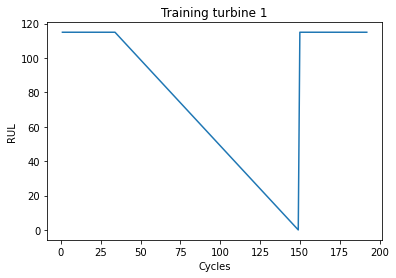

In [14]:
#on y_train

plt.plot(range(1,193),Y_train[0:192])
plt.xlabel('Cycles')
plt.ylabel('RUL')
plt.title('Training turbine 1')

Text(0.5, 1.0, 'Testing turbine 1')

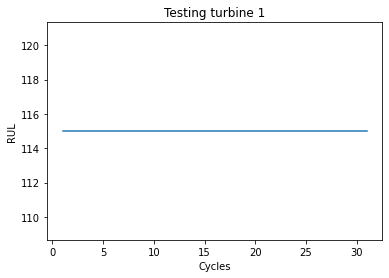

In [15]:
#on y_test

plt.plot(range(1,32),Y_test[0:31])
plt.xlabel('Cycles')
plt.ylabel('RUL')
plt.title('Testing turbine 1')

In [16]:
#X1, y1 = shuffle(X_train,Y_train, random_state=23)
X1, y1 = X_train, Y_train

In [17]:
from sklearn.preprocessing import MinMaxScaler
normaliser = MinMaxScaler(feature_range = (-1,1))
X1 = normaliser.fit_transform(X1)
X_test = normaliser.transform(X_test)

In [18]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense, Dropout, Conv1D, Flatten

def crt_model(activation):
    model = Sequential()
    model.add(Dense(650,input_dim=14, activation=activation,  kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(650, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(450, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(350, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(250, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(150, activation=activation, kernel_initializer='glorot_uniform', kernel_regularizer='l2'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=[keras.metrics.RootMeanSquaredError()])
    return model

In [19]:
reg = KerasRegressor(build_fn=crt_model, verbose=1, epochs=2000, activation='tanh', batch_size=256)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [20]:
history = reg.fit(X1, y1)

Epoch 1/2000
210/210 [==============================] - 4s 4ms/step - loss: 4451.9487 - root_mean_squared_error: 66.5635
Epoch 2/2000
210/210 [==============================] - 1s 4ms/step - loss: 2323.5515 - root_mean_squared_error: 47.9921
Epoch 3/2000
210/210 [==============================] - 1s 4ms/step - loss: 1675.3202 - root_mean_squared_error: 40.7014
Epoch 4/2000
210/210 [==============================] - 1s 4ms/step - loss: 1530.8733 - root_mean_squared_error: 38.9099
Epoch 5/2000
210/210 [==============================] - 1s 4ms/step - loss: 1507.2651 - root_mean_squared_error: 38.6299
Epoch 6/2000
210/210 [==============================] - 1s 4ms/step - loss: 1551.7520 - root_mean_squared_error: 39.1499
Epoch 7/2000
210/210 [==============================] - 1s 4ms/step - loss: 1504.7886 - root_mean_squared_error: 38.5421
Epoch 8/2000
210/210 [==============================] - 1s 4ms/step - loss: 1508.3490 - root_mean_squared_error: 38.6001
Epoch 9/2000
210/210 [==========

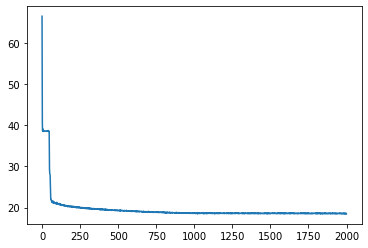

In [21]:
plt.plot(history.history['root_mean_squared_error'])
plt.show()

In [22]:
result = reg.predict(X_test)

133/133 [==============================] - 0s 2ms/step


In [23]:
result = np.ravel(result)

In [24]:
print('RMSE: ',np.sqrt(mean_squared_error(result,Y_test)))

RMSE:  15.842420178408238


In [25]:
def plotfun(testdata, result, Y_test, x, pval):
    g2 = testdata.groupby([0])
    d2 = (g2.last()).sort_index().reset_index().drop_duplicates()
    
    low=0
    for i in range(x):
        if(i==x-1):
            high=d2.iloc[i][1]
        else:
            low+=d2.iloc[i][1]    
    
    if(pval):
        print('Lower Limit: ',low)
        print('Upper Limit: ',low + high)
        print('Cycles:',high)
        
    low = int(low)
    high=int(high)
    
    fig=plt.figure(figsize=[10,5])
    plt.plot(range(1,int(high)+1),Y_test[low:low+high])
    plt.plot(range(1,int(high)+1),result[low:low+high])
    plt.ylim([0,150])
    plt.xlabel('Cycles')
    plt.ylabel('RUL')
    plt.title('Testing turbine ' + str(x))
    plt.legend(['Actual','Predicted'])

Lower Limit:  11074.0
Upper Limit:  11150.0
Cycles: 76.0


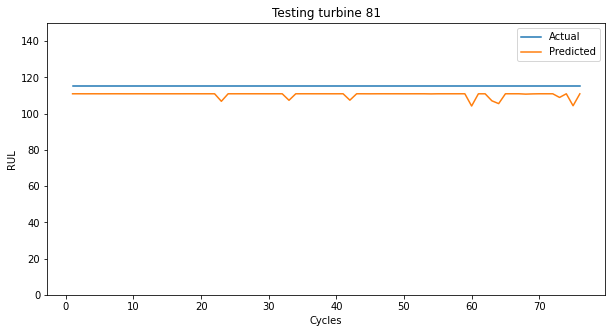

In [26]:
plotfun(testdata, result, Y_test, 81, True)

In [ ]:
fig=plt.figure(figsize=[10,5])
plt.plot(range(1,127),(result[80:206]-Y_test[80:206]))
plt.plot(range(1,127),np.zeros((126)))
plt.xlabel('Cycles')
plt.ylabel('RUL Deviation')
plt.legend(['Deviation','Zero Line'])
plt.title('Testing turbine 3 - RUL Deviation')